# Práctica 6: Introducción a Redes Neuronales con Keras y Tensorflow

Universidad Iberoamericana Ciudad de México, Primavera 2024

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition*.

**Objetivos**:
- Introducir la API de Keras a los estudiantes para la implementación de redes neuronales con Tensorflow.
- Implementar ideas básicas de una red neuronal mediante un ejemplo práctico de clasificación usando el dataset MNIST.
- Introducir métricas de evaluación, funciones de activación y funciones de pérdida.

[Keras](https://keras.io/) es una API de alto nivel que nos permite construir, entrenar, evaluar y ejecutar modelos de redes neuronales profundas que se caracteriza por su facilidad de uso,  flexibilidad y su diseño pensado en ser entendible para los humanos. Actualmente, se utiliza en diversos proyectos alrededor del mundo, incluidos el CERN y la NASA.



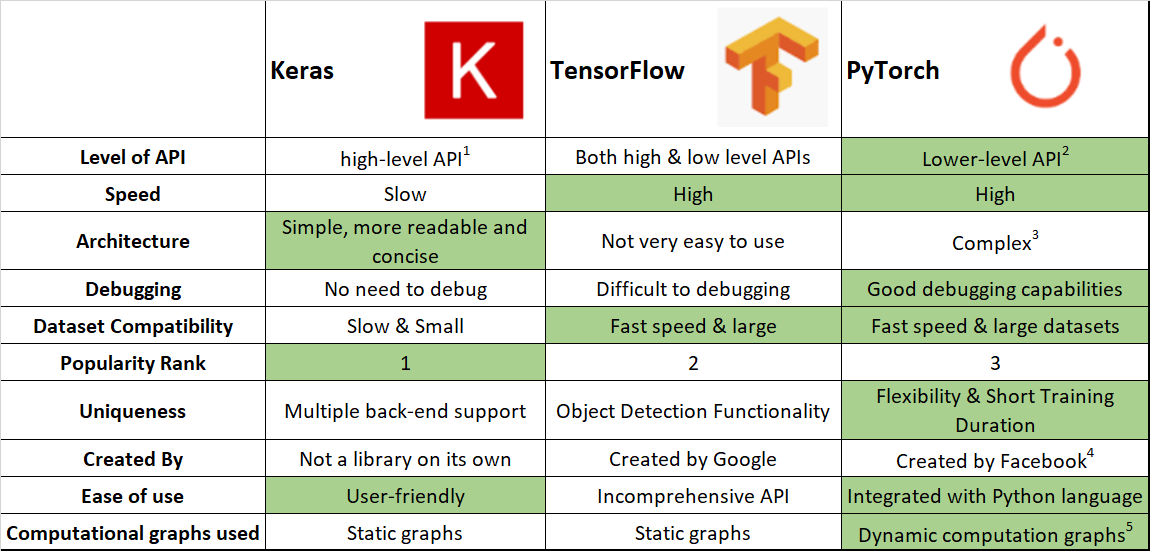
Fuente: https://blog.gopenai.com/tensorflow-vs-pytorch-vs-keras-9161988c19b9

**Actividad**: ¿Qué es una API? Responder en una celda de texto abajo.

## Carga de librerías y conjunto de datos

In [1]:
import keras
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

En primer lugar, vamos a revisar las versiones de nuestras librerías principales para esta práctica:

In [2]:
tf.__version__

'2.15.0'

In [3]:
keras.__version__

'2.15.0'

En esta práctica vamos a realizar una de las tareas más comúnes con las que se suele iniciar a la gente en las redes neuronales: vamos a construir un clasificador de imágenes.

Primero necesitamos nuestros datos. Keras provee algunas funciones de utilidad para descargar y cargar conjuntos de datos comúnmente usados. En este caso, vamos a utilizar el dataset llamado MNIST, el cual constade 70,000 imágenes en blanco y negro de 28x28 pixeles cada una con 10 clases distintas, una para cada dígito posible.

Empezamos cargando los datos mediante Keras:

In [4]:
mnist = keras.datasets.mnist

In [5]:
(X_train_full,y_train_full), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


A diferencia de cargar los datos con Scikit-learn, cada imagen se representa como un arreglo (o matriz) de 28x28 en lugar de un vector de una dimensión de tamaño 784. Además, las intensidades de los pixeles se representan como números enteros (entre 0 y 255) en lugar de números flotantes (0.0 a 255.0).

**Pregunta**: ¿Por que los valores de los pixeles van desde 0 hasta 255? Escribir su respuesta abajo.

Vamos a darle un vistazo a la forma y tipo de dato de nuestro conjunto de entrenamiento `X_train_full`

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

Para entrenar una red neuronal necesitamos un conjunto de datos adicional: el de validación, por lo que necesitamos train, test y validation. Debemos crearlo en este punto. Además, también necesitamos escalar los datos (pixeles) para que queden entre 0 y 1, ya que mejora el desempeño de gradiente descendiente, nuestro algoritmo de optimización.

**Pregunta**: ¿Cómo escalamos los datos para que queden entre 0 y 1?

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_train.dtype

dtype('float64')

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

## Visualización de los datos

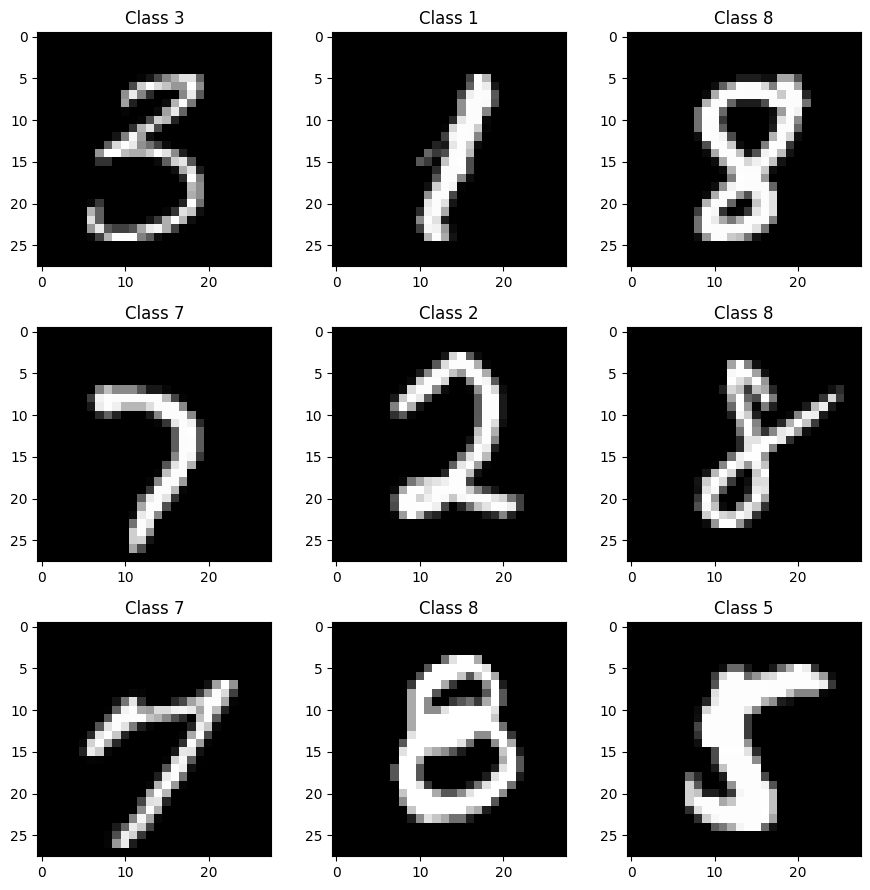

In [14]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Con MNIST, las etiquetas de cada clase indican el digito que corresponde a cada imagen. Por ejemplo, la clase 4 indica que la imagen muestra un número 4.

In [15]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Por ejemplo, para la primera imagen su clase es

In [16]:
y_train[0]

7

y la etiqueta o nombre de la clase es

In [17]:
class_names[y_train[0]]

'7'

## Construcción de la red neuronal usando la Sequential API

Vamos a construir el modelo de la red neuronal que se muestra en la siguiente imagen:

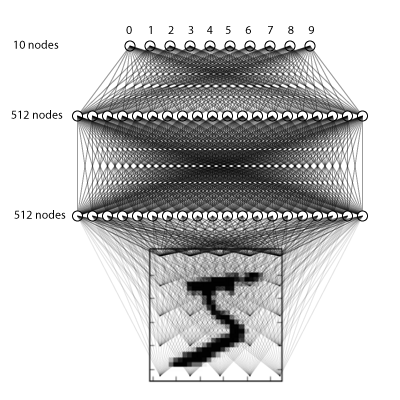

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Dense(10, activation='softmax'))



* La primera linea crea un modelo secuencial, el más simple disponible en Keras. Este consiste en conjuntos de capas que se conectan una despúes de otra. A esto se le conoce como la Sequential API.
* Después, añadimos la primera capa de nuestra red al modelo secuencial. Es una capa `Flatten` cuyo trabajo es convertir cada entrada (que es una matriz de 28x28) en un arreglo 1D (lo que hace es `X.reshape(-1,28*28)`). Dado que es una capa de procesamiento, no cuenta con parámetro (pesos) alguno. Sin embargo, al ser la primera capa, debemos especificar el tamaño de las entradas en `input_shape = (28,28)`.
* Después, añadimos una capa densa, que sería nuestra primer capa oculta, la cual cuenta con 512 neuronas y función de activación ReLU.
* Nuestra segunda capa oculta también es una capa densa, de 512 neuronas y función de activación ReLU. Noten que esta función de activación también se puede especificar fuera de la capa, similar a una capa independiente, pero que forma parte de la anterior inmediata.
* Finalmente, la capa de salida cuenta con 10 neuronas (una para cada clase) usando la función de activación softmax. Dado que es un problema de clasificación, la función softmax permite que las salidas se calculen e intrepreten como una función de probabilidad (valores entre 0 y 1, y suman 1).



**Actividad**: Investiguen la fórmula de la función de activación softmax y su interpretación. Responder en una celda de texto abajo.

La función de activación ReLU se define de la siguiente manera:

$$ReLU(z) = max(0,z)$$

A pesar de que esta función no es derivable en $z = 0$ y su derivada es 0 para $z<0$, en práctica es una buena función de activación que tiene la ventaja de ser muy rápida de calcular. Esto ha hecho que se utilice pr default en muchos modelos de redes neuronales.

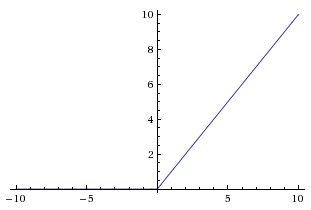

Otras funciones de activación que hemos visto hasta el momento y sus derivadas:

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

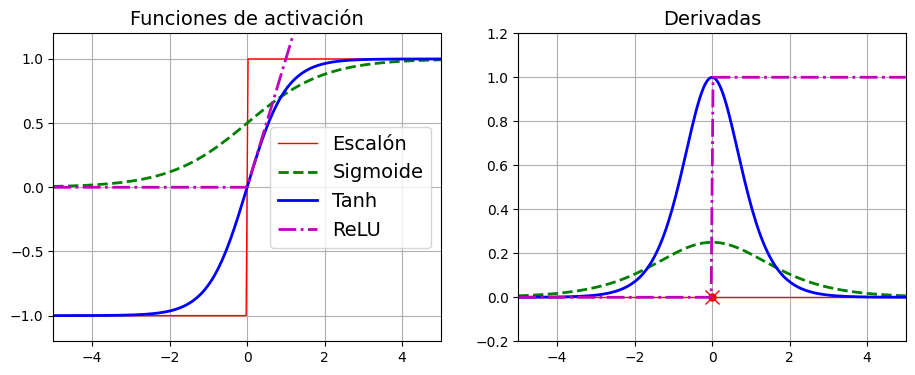

In [20]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoide")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funciones de activación", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoide")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivadas", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

Otra forma de definir el modelo anterior es de la siguiente manera:

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

El método `summary()` del modelo definido anteriormente nos muestra una descripción de nuestro modelo:

- las capas que lo conforman, incluidos sus nombres, tamaño de entrada y número de parámetros.
- el número total de parámetros, incluido el número de parámetros entrenables y no entrenables.



In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


También podemos obtener una lista de las capas de nuestro modelo para extraerlas por su índice o por su nombre:

In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense_3'

In [27]:
model.get_layer('dense_3') is hidden1

True

Todos los parámetros de una capa puden accederse usando los métodos `get_weights()` y `set_weights()`. Para nuestra capa densa, esto incluye los pesos de conexión entre neuronas y el bias:

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[-0.02077845,  0.04604723,  0.03910667, ..., -0.05575917,
         0.0559258 , -0.03340275],
       [ 0.01025225, -0.00964158,  0.03585502, ...,  0.02911334,
         0.03306773, -0.01296568],
       [ 0.05551158, -0.05316536,  0.06384847, ..., -0.01239479,
        -0.02084949,  0.03138768],
       ...,
       [ 0.05265585, -0.04922066, -0.0176262 , ..., -0.04168814,
         0.06022164,  0.05683477],
       [ 0.06110221, -0.0359998 , -0.0079388 , ...,  0.00658379,
        -0.05359894, -0.03563303],
       [ 0.02488919,  0.04808763,  0.02500828, ..., -0.02423692,
         0.06657906, -0.03201183]], dtype=float32)

In [30]:
weights.shape

(784, 512)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(512,)

Noten que los pesos iniciales entre las capas se eligen aleatoriamente (después discutiremos eso), y el bias se inicia en 0, lo cual está bien. Más adelante comentaremos como cambiar estos valores si así se desea.

## Compilación del modelo

Después de crear el modelo, debemos compilarlo con el método `compile()`, el cual permite especificar la función de pérdida y el optimizador, además de otras métricas a calcular durante el entrenamiento y evaluación.

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- `sparse_categorical_crossentropy` es nuestra función de pérdida. Esta se utiliza para clasificación cuando nuestras salidas son etiquetas dispersas (i.e., la salida solo es [9] en lugar del vector [0,0,0,0,0,0,0,0,1]). Para el segundo caso se utiliza `categorical_crossentropy`.
- `sgd` indica que como algoritmo de optimización usaremos gradiente descendiente estocástico. Existen otros, pero usaremos este por el momento.
- En `metrics` le pasamos al modelo una lista con las métricas de evaluación que queremos use durante el entrenamiento del modelo. Pueden revisar cuales usar [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).

## Entrenamiento y evaluación del modelo

Una vez que el modelo se encuentra listo para su entrenamiento, vamos a llamar el método `fit()`:

In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5810 - accuracy: 0.8569 - val_loss: 0.2936 - val_accuracy: 0.9186
Epoch 2/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2799 - accuracy: 0.9197 - val_loss: 0.2310 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2280 - accuracy: 0.9348 - val_loss: 0.1971 - val_accuracy: 0.9462
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1939 - accuracy: 0.9450 - val_loss: 0.1710 - val_accuracy: 0.9526
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1685 - accuracy: 0.9522 - val_loss: 0.1524 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1484 - accuracy: 0.9572 - val_loss: 0.1377 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1324 - accuracy: 0.9627 - val_loss: 0.1242 - val_a

Como argumentos pasamos los datos `X_train` y sus valores objetivo `y_train`. También especificamos el número de `epochs` (cuantas veces se entrena la red con toda la información) y, opcionalmente, un conjunto de validación con el cual se mide la pérdida y las métricas especificadas al final de cada epoch, que nos permite apreciar que tan bien hace su trabajo nuestro modelo.

**Actividad**: ¿Qué hacen los primeros 10 parámetros del método `fit()`? Escribir su respuesta abajo en una celda de texto.

El método `fit()` regresa un objeto `History` que contiene los parámetros de entrenamiento (`history.params`), la lista de epochs que recorrió (`history.epoch`) y un diccionario (`history.history`) que contiene la pérdida y métricas que se determinaron al final de cada epoch en el conjunto de entrenamiento y el conjunto de validación.

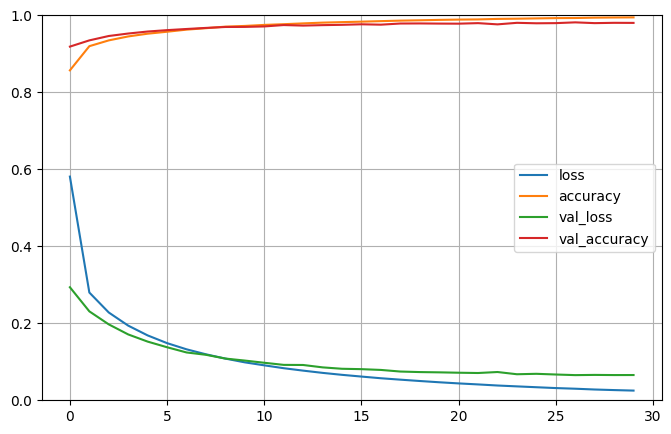

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

**Pregunta**: ¿Cómo interpretan la gráfica anterior? Escriban su respuesta en la celda de abajo.

### Evaluación del modelo obtenido y predicciones para datos que no ha visto antes

Para realizar la evaluación final del modelo se utilizar el método `evaluate()` pasando como argumentos `X_test` y `y_test`.

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 12.2195 - accuracy: 0.9764


[12.219450950622559, 0.9764000177383423]

**Pregunta**: Comparen el último valor de accuracy en el conjunto de validación al entrenar el modelo y el valor de accuracy al evaluar con el conjunto de prueba. ¿Cuál es mayor y cuál es menor?¿Esperan este comportamiento? Justifiquen su respuesta.

## Usando el modelo para hacer predicciones

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [38]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


¿Cómo se ve la predicción? Es un arreglo de (en este caso) 10 clases, donde a cada entrada se le asigna un valor de *probabilidad*. Para determinar el valor final de la clase, se considera el más alto entre todos ellos.

In [39]:
predictions[56]

array([0.        , 0.        , 0.        , 0.        , 0.99999994,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [40]:
np.argmax(predictions[56])

4

In [41]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [42]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

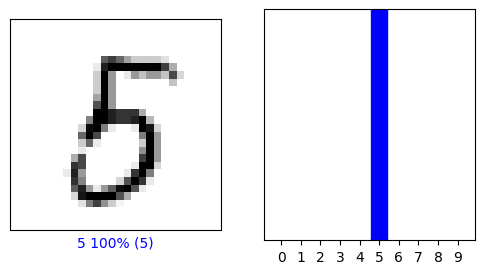

In [49]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

## Guardar un modelo para después y cargarlo


La mayoría de los modelos de redes neuronales toman tiempo en entrenarse. ¿Qué sucede si un modelo tarda en entrenarse 1 semana o 1 mes? En esos casos, vamos a guardar nuestras redes neuronales entrenadas para cargarlas cuando sea necesario. Keras utiliza el formato de archivo HDF5, que guarda tanto la arquitectura del modelo como los valores de todos los parámetros de cada capa del modelo.

In [50]:
model.save("keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


¿Y para cargarlo en otro momento?

In [51]:
other_model = keras.models.load_model('keras_model.h5')

## Ajuste de parámetros de una red neuronal

La flexibilidad de las redes neuronales permite atacar diversos problemas que otros modelos no. Sin embargo, esto suele ser un arma de doble filo ya que existen varios hiperparámetros que se deben ajustar: pueden imaginar cualquier arquitectura e implementarla y modificar el número de capas, número de neuronas por capa, funciones de activación, la inicialización de los pesos, entre muchos otros.

¿Qué sucede si no obtengo un buen rendimiento? ¡Debemos tunear los parámetros¡


* El primer parámetro que debe uno revisar es la taza de aprendizaje del Gradiente. Entre más pequeña sea, más tarda en converger.
* La segunda opción es ajustar distintos **hiperparámetros** del modelo:
 * Número de capas
 * Número de neuronas por capa
 * Las funciones de activación
* Otra opción es ajustar el tamaño del batch (por default 32).



Afortundamente existen diversas librerías que nos pueden ayudar a realizar esta tarea, ya que básicamente es buscar en un área las mejores combinaciones que regresan un buen modelo. Algunas opciones incluyen Hyperopt, Hyperas, Keras Tuner, Scikit-Optimiza, Spearmint, Sklearn-Deap

## Ejercicios

### Ejercicio 1

Implementar el early stopping como lo sugiere [tensorflow](https://keras.io/api/callbacks/early_stopping). Reentrenar el modelo anterior especificando el número de epochs en 50 y obtener la gráfica accuracy vs epochs correspondiente para el nuevo valor de epochs que encuentra este callback. Como regla, se suele usar como paciencia en el early stopping un 10% del total de epochs.

### Ejercicio 2

Usando su modelo entrenado (que guardaron y puden cargar en un futuro), van a generar tres imágenes de dígitos escritos a mano y predecir su clase correspondiente. La idea es la siguiente:


1. Generar las imágenes. Para esto les recomiendo que usen tinta negra (por ejemplo, un plumón) en un fondo blanco (ficha bibliográfica o una hoja de papel). Tomen fotos usando una cámara.
2. Cargen las imágenes anteriores al sistema (por ejemplo, usando lo librería de skimage en Python). Deben de procesar las imágenes para que se vuelvan en blanco y negro, además de cambiar su tamaño a 28 por 28 pixeles.
3. Ya que tienen las imágenes cargas en el sistema (son un arreglo de numpy), aliméntenlas al modelo para obtener su clase.
4. Resultados.
